*Read section 3.2 of the book before using these notes.*

*Note that in this course, lecture notes are not sufficient, you must read the book for better understanding. Lecture notes are just implementing the concepts of the book on a dataset, but not explaining the concepts elaborately.*

## Multiple Linear Regression

In [32]:
# importing libraries 
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

**Develop a multiple linear regression model that predicts car price based on engine size, year, mileage, and mpg.**
Datasets to be used: *Car_features_train.csv, Car_prices_train.csv*

In [33]:
# Reading datasets
trainf = pd.read_csv('./Datasets/Car_features_train.csv')
trainp = pd.read_csv('./Datasets/Car_prices_train.csv')
train = pd.merge(trainf,trainp)
train.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,18473,bmw,6 Series,2020,Semi-Auto,11,Diesel,145,53.3282,3.0,37980
1,15064,bmw,6 Series,2019,Semi-Auto,10813,Diesel,145,53.0430,3.0,33980
2,18268,bmw,6 Series,2020,Semi-Auto,6,Diesel,145,53.4379,3.0,36850
3,18480,bmw,6 Series,2017,Semi-Auto,18895,Diesel,145,51.5140,3.0,25998
4,18492,bmw,6 Series,2015,Automatic,62953,Diesel,160,51.4903,3.0,18990


### Training the model

In [34]:
#Using the ols function to create an ols object. 'ols' stands for 'Ordinary least squares'
ols_object = smf.ols(formula = 'price~year+mileage+mpg+engineSize', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     2410.
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        03:10:20   Log-Likelihood:                -52497.
No. Observations:                4960   AIC:                         1.050e+05
Df Residuals:                    4955   BIC:                         1.050e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.661e+06   1.49e+05    -24.593      0.000   -3.95e+06   -3.37e+06
year        1817.7366     73.751     24.647      0.000    1673.151    1962.322
mileage       -0.1474      0.009    -16.817      0.000      -0.165      -0.130
mpg          -79.3126      9.338     -8.493      0.000     -97.620     -61.006
engineSize  1.218e+04    189.969     64.107      0.000    1.18e+04    1.26e+04
==============================================================================
Omnibus:                     2450.973   Durbin-Watson:                   0.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31060.548
Skew:                           2.045   Prob(JB):                         0.00
Kurtosis:                      14.557   Cond. No.                     3.83e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model equation is: estimated car `price` = -3.661e6 + 1818 * `year` -0.15 * `mileage` - 79.31 * `mpg` + 12180 * `engineSize`

The procedure to fit the model using `sklearn` will be similar to that in simple linear regression.

In [ ]:
model = LinearRegression()

X_train = train[['year','engineSize','mpg','mileage']] # Slice out the predictors
y_train = train[['price']]

model.fit(X_train,y_train)

### Hypothesis test for a relationship between the response and a subset of predictors

Let us test the hypothesis if there is relationship between car price and the set of predictors: `mpg` and `year`.

In [35]:
hypothesis = '(mpg = 0, year = 0)'     
    
model.f_test(hypothesis) # the F test of these two predictors is stat. sig.

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=325.9206432972666, p=1.0499509223096256e-133, df_denom=4.96e+03, df_num=2>

As the $p$-value is low, we reject the null hypothesis, i.e., at least one of the predictors among `mpg` and `year` has a statistically significant relationship with car price.

**Predict the car price for the cars in the test dataset**. Datasets to be used: *Car_features_test.csv, Car_prices_test.csv*

In [36]:
testf = pd.read_csv('./Datasets/Car_features_test.csv')
testp = pd.read_csv('./Datasets/Car_prices_test.csv')

### Prediction 

In [37]:
pred_price = model.predict(testf)

**Make a visualization that compares the predicted car prices with the actual car prices**

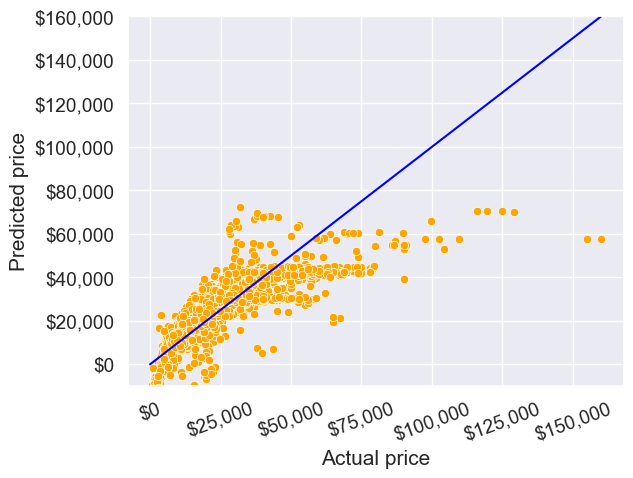

In [45]:
sns.set(font_scale=1.25)
sns.scatterplot(x = testp.price, y = pred_price, color = 'orange')
#In case of a perfect prediction, all the points must lie on the line x = y.
ax = sns.lineplot(x = [0,testp.price.max()], y = [0,testp.price.max()],color='blue') #Plotting the line x = y.
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.ylim([-10000, 160000])
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')
plt.xticks(rotation=20);

The prediction looks better as compared to the one with simple linear regression. This is because we have four predictors to help explain the variation in car price, instead of just one in the case of simple linear regression. Also, all the predictors  have a significant relationship with price as evident from their p-values. Thus, all four of them are contributing in explaining the variation. Note the higher values of $R^2$ as compared to the one in the case of simple linear regression.

**What is the RMSE of the predicted car price?**

In [7]:
np.sqrt(((testp.price - pred_price)**2).mean())

9956.82497993548

**What is the residual standard error based on the training data?**

In [8]:
np.sqrt(model.mse_resid)

9563.74782917604

In [49]:
trainp.describe()

,carID,price
count,4960.000000,4960.000000
mean,15832.446169,23469.943750
std,2206.717006,16406.714563
min,12002.000000,450.000000
25%,13929.250000,12000.000000
50%,15840.000000,18999.000000
75%,17765.750000,30335.750000
max,19629.000000,145000.000000


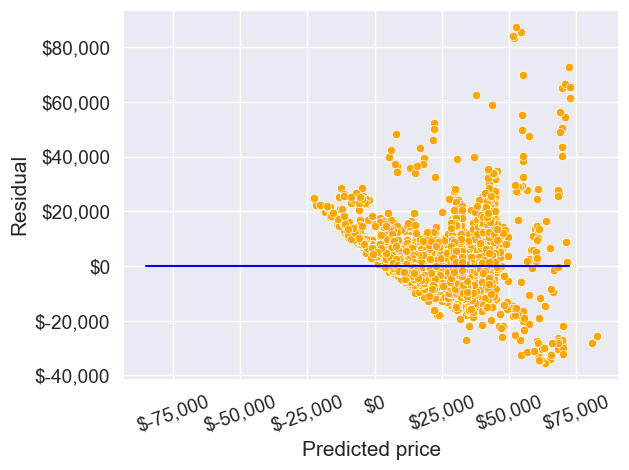

In [48]:
sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
ax = sns.lineplot(x = [pred_price.min(),pred_price.max()],y = [0,0],color = 'blue')
plt.xlabel('Predicted price')
plt.ylabel('Residual')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')
plt.xticks(rotation=20);

### Effect of adding noisy predictors on $R^2$

**Will the explained variation (R-squared) in car price always increase if we add a variable?**

**Should we keep on adding variables as long as the explained variation (R-squared) is increasing?**

In [10]:
#Using the ols function to create an ols object. 'ols' stands for 'Ordinary least squares'
np.random.seed(1)
train['rand_col'] = np.random.rand(train.shape[0])
ols_object = smf.ols(formula = 'price~year+mileage+mpg+engineSize+rand_col', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1928.
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:07:38   Log-Likelihood:                -52497.
No. Observations:                4960   AIC:                         1.050e+05
Df Residuals:                    4954   BIC:                         1.050e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.662e+06   1.49e+05    -24.600      0.000   -3.95e+06   -3.37e+06
year        1818.1672     73.753     24.652      0.000    1673.578    1962.756
mileage       -0.1474      0.009    -16.809      0.000      -0.165      -0.130
mpg          -79.2837      9.338     -8.490      0.000     -97.591     -60.976
engineSize  1.218e+04    189.972     64.109      0.000    1.18e+04    1.26e+04
rand_col     451.1226    471.897      0.956      0.339    -474.004    1376.249
==============================================================================
Omnibus:                     2451.728   Durbin-Watson:                   0.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31040.331
Skew:                           2.046   Prob(JB):                         0.00
Kurtosis:                      14.552   Cond. No.                     3.83e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adding a variable with random values to the model (`rand_col`) increased the explained variation ($R^2$). This is because the model has one more parameter to tune to reduce the residual squared error $(RSS)$. However, the $p$-value of `rand_col` suggests that its coefficient is zero. Thus, using the model with `rand_col` may give poorer performance on unknown data, as compared to the model without `rand_col`. This implies that it is not a good idea to blindly add variables in the model to increase $R^2$.